# ***IMAGE CLASSIFICATION***

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
import cv2
import imghdr
from PIL import Image

#DATASET


# 1.   DATA COLLECTION

1.   The data has been collected in a total of 4 classes which are animals,   humans,plants and non-living things.
2.   A total of 1278 images have been manually or collected from google images 320 approximately from each class.

# 2. DATA PREPROCESSING  


1.   Data Cleaning : The images which are duplicate or not of the necessary format are removed.
2.   All the images are then converted to jpg, renamed in an order and then reduced to same size 32x32 pixels to help improve the accuracy.













In [3]:
data_dir = 'dataset' #THE DATASET IS AVAILABLE ON THE GITHUB PAGE, CHANGE THE FILE PATH ACCORDING TO YOUR LOCAL HOST

In [4]:
image_exts = ['jpeg', 'jpg', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [6]:
data=[]
labels=[]

In [7]:
classes = os.listdir(data_dir)
for class_label in classes:
    class_path = os.path.join(data_dir, class_label)
    image_files = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".jpg") or img.endswith(".jpeg")]
    for image_file in image_files:
        img=cv2.imread(image_file)
        img=cv2.resize(img,(32,32))
        data.append(img)
        labels.append(class_label)

# **SPLITTING THE DATA INTO TRAINING DATASET AND TESTING DATASET**

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
x_train=np.array(train_data)
x_test=np.array(test_data)
y_train=np.array(train_labels,dtype='uint8')
y_test=np.array(test_labels,dtype='uint8')
print(x_train.shape)
x_test.shape

(1019, 32, 32, 3)


(255, 32, 32, 3)

In [10]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

In [11]:
lclasses = ["Animals","Humans","Plants","Non-Liv"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index],cmap='gray')
    plt.xlabel(lclasses[y[index]])


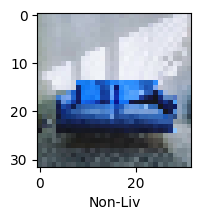

In [13]:
plot_sample(x_train, y_train, 1018)

# **NORMALIZING THE DATASET**
Normalizing a dataset is a data preprocessing technique used to rescale the values of numerical features within a specific range, typically between 0 and 1 or -1 and 1. Normalization is performed to ensure that all features contribute equally to the analysis and that differences in the scale of features do not unduly influence machine learning algorithms. It is particularly important for algorithms that are sensitive to the scale of input data, such as gradient-based optimization algorithms used in deep learning and some distance-based algorithms.

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# **THE IMAGE CLASSIFICATION MODEL**

1.   **ARTIFICAL NEURAL NETWORK (ANN)**
2.   **CONVOLUTIONAL NEURAL NETWROK(CNN)**



# **1. ARTIFICIAL NEURAL NETWORK MODEL**

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



ann_history = ann.fit(x_train, y_train, batch_size= 32,epochs=20)

Epoch 1/20
32/32 [==============================] - 3s 52ms/step - loss: 1.6074 - accuracy: 0.2934
Epoch 2/20
32/32 [==============================] - 2s 49ms/step - loss: 1.3859 - accuracy: 0.3847
Epoch 3/20
32/32 [==============================] - 2s 47ms/step - loss: 1.2873 - accuracy: 0.4073
Epoch 4/20
32/32 [==============================] - 2s 49ms/step - loss: 1.1653 - accuracy: 0.5358
Epoch 5/20
32/32 [==============================] - 2s 48ms/step - loss: 1.1550 - accuracy: 0.5191
Epoch 6/20
32/32 [==============================] - 2s 53ms/step - loss: 1.0835 - accuracy: 0.5741
Epoch 7/20
32/32 [==============================] - 2s 52ms/step - loss: 0.9923 - accuracy: 0.6183
Epoch 8/20
32/32 [==============================] - 1s 43ms/step - loss: 1.0256 - accuracy: 0.5996
Epoch 9/20
32/32 [==============================] - 1s 41ms/step - loss: 1.0204 - accuracy: 0.5986
Epoch 10/20
32/32 [==============================] - 1s 42ms/step - loss: 0.9146 - accuracy: 0.6762
Epoch 11/

# **2. CONVOLUTIONAL NEURAL NETWORK MODEL**

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

cnn = keras.Sequential()

cnn.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(128, activation='relu'))

cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [17]:
cnn_hist = cnn.fit(x_train, y_train, epochs=20 )

Epoch 1/20
32/32 [==============================] - 2s 18ms/step - loss: 1.4593 - accuracy: 0.3101
Epoch 2/20
32/32 [==============================] - 1s 18ms/step - loss: 1.1766 - accuracy: 0.5152
Epoch 3/20
32/32 [==============================] - 1s 19ms/step - loss: 0.9937 - accuracy: 0.5927
Epoch 4/20
32/32 [==============================] - 1s 19ms/step - loss: 0.8720 - accuracy: 0.6771
Epoch 5/20
32/32 [==============================] - 1s 19ms/step - loss: 0.7824 - accuracy: 0.7242
Epoch 6/20
32/32 [==============================] - 1s 21ms/step - loss: 0.7364 - accuracy: 0.7350
Epoch 7/20
32/32 [==============================] - 1s 21ms/step - loss: 0.6426 - accuracy: 0.7802
Epoch 8/20
32/32 [==============================] - 1s 21ms/step - loss: 0.6073 - accuracy: 0.7851
Epoch 9/20
32/32 [==============================] - 1s 24ms/step - loss: 0.5269 - accuracy: 0.8302
Epoch 10/20
32/32 [==============================] - 1s 26ms/step - loss: 0.4770 - accuracy: 0.8499
Epoch 11/

# **TRAINING ACCURACY AND REPRESENTING SOME RELEVANT GRAPHS**

In [18]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test, y_test)
print(cnn_test_accuracy*100, "%")

8/8 [==============================] - 0s 6ms/step - loss: 0.8816 - accuracy: 0.7255
72.54902124404907 %


In [19]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)

print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

8/8 [==============================] - 0s 11ms/step - loss: 1.2144 - accuracy: 0.5059
Test Loss :  1.2143787145614624
Test Accuracy :  0.5058823823928833


Test Loss: 1.2143787145614624
Test Accuracy: 50.58823823928833 %


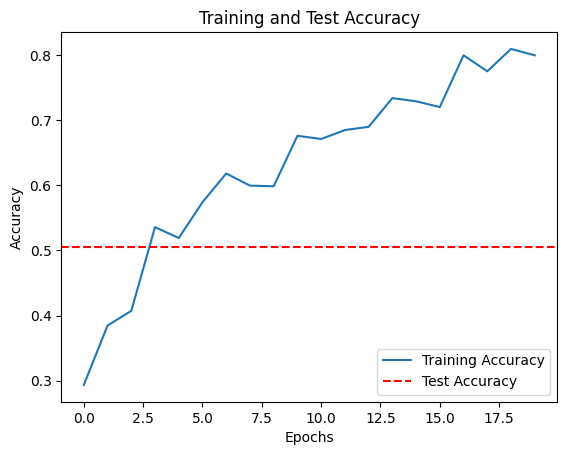

In [20]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100, "%")

plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.show()

0.965652585029602


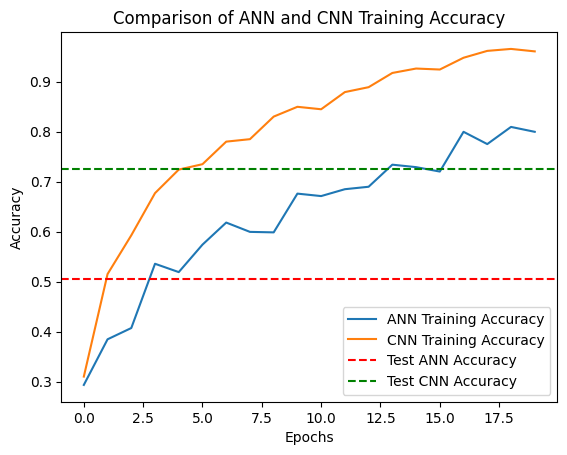

In [21]:
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(cnn_hist.history['accuracy'], label='CNN Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test ANN Accuracy')
plt.axhline(y=cnn_test_accuracy, color='g', linestyle='--', label='Test CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Comparison of ANN and CNN Training Accuracy')

print(max(cnn_hist.history['accuracy']))
plt.show()

# **TESTING OUR TESTING DATASET**

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]


8/8 [==============================] - 0s 6ms/step


array([[9.9995518e-01, 1.3437535e-05, 2.2585346e-06, 2.9101906e-05,
        3.2354197e-12, 1.5352671e-11, 3.9222948e-12, 8.4465898e-12,
        2.7010899e-11, 3.3011104e-11],
       [7.1449289e-03, 9.8808998e-01, 3.4401153e-04, 4.4201496e-03,
        1.5149597e-07, 2.3070434e-07, 9.7884623e-08, 9.6063161e-08,
        1.3552325e-07, 2.7425577e-07],
       [8.3211321e-01, 4.8157178e-02, 1.1916880e-01, 5.6066277e-04,
        4.1864898e-09, 4.1690569e-08, 1.9487311e-08, 1.2265224e-08,
        1.7899726e-08, 4.4702890e-08],
       [4.1178796e-01, 1.5716800e-02, 4.9468872e-01, 7.7745117e-02,
        4.5916208e-06, 1.5044394e-05, 5.2202640e-06, 3.6141232e-06,
        2.2778551e-05, 1.0076314e-05],
       [2.3414938e-01, 6.2681228e-01, 1.3110527e-01, 7.7012437e-03,
        2.2275479e-05, 4.9758160e-05, 2.8372280e-05, 3.3455242e-05,
        3.8440485e-05, 5.9548576e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 1, 0, 2, 1]

In [24]:
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

1


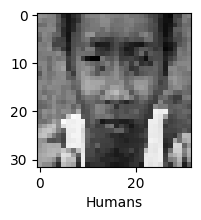

In [35]:
a= int(input("Enter index:"))
print(y_classes[a])
plot_sample(x_test, y_classes, a)

In [36]:
classes[y_classes[3]]

'2'

1


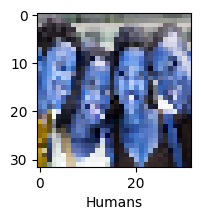

In [37]:
a= int(input("Enter index:"))
print(y_classes[a])
plot_sample(x_test, y_classes, a)

0


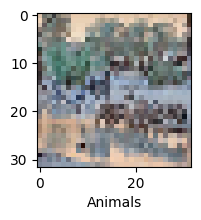

In [38]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_classes, a)

1


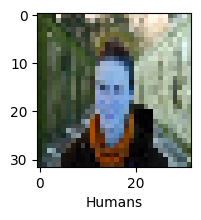

In [39]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_classes, a)

3


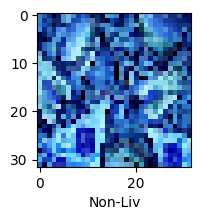

In [40]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_classes, a)